## Importation des données

In [33]:
import json
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6] # default = [6.0, 4.0]
plt.rcParams['figure.dpi']     = 200     # default = 72.0
plt.rcParams['font.size']      = 7.5     # default = 10.0


import warnings
warnings.filterwarnings("ignore")

In [12]:
data = pd.read_csv('SeoulBikeData.csv', sep=',')

In [13]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Transformation des mots en chiffre

In [14]:
data['Holiday (int)'] = data['Holiday'].apply(lambda x: 0 if x == 'No Holiday' else 1)

data.loc[data['Seasons'] == 'Winter', 'Seasons (int)'] = 1
data.loc[data['Seasons'] == 'Spring', 'Seasons (int)'] = 2
data.loc[data['Seasons'] == 'Summer', 'Seasons (int)'] = 3
data.loc[data['Seasons'] == 'Autumn', 'Seasons (int)'] = 4

data['Functioning Day (int)'] = data['Functioning Day'].apply(lambda x: 1 if x == 'Yes' else 0)



data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Holiday (int),Seasons (int),Functioning Day (int)
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1.0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1.0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1.0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1.0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1.0,1


# Valeurs nulles

In [15]:
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Holiday (int)                0
Seasons (int)                0
Functioning Day (int)        0
dtype: int64

Il n'y a pas de valeur nulle. Cela facilite le traitement des données.

# Functioning day (int)

In [16]:
data.groupby(['Functioning Day (int)']).agg({'Rented Bike Count': ['sum']}).reset_index()

,Functioning Day (int),Rented Bike Count
,,sum
0,0,0
1,1,6172314


Il n'y a pas de vélo emprunté lorsque nous ne sommes pas en jour de fonctionnement. 
On ne peut entrainer notre modele sur cette variable.
Nous ne prendrons donc pas en compte cette variable par la suite.

Suppression de la colonne Functioning Day

In [17]:
print(f'before: {len(data)}')
data = data[data['Functioning Day (int)'] == 1].drop('Functioning Day (int)', axis=1)
print(f'after: {len(data)}')

before: 8760
after: 8465


# Distribution des donnees

Le but du dataset est visiblement de prévoir, à l'aide des données météologiques et horaires, le nombre de vélo à prévoir par heure. Nous allons donc le visualiser.

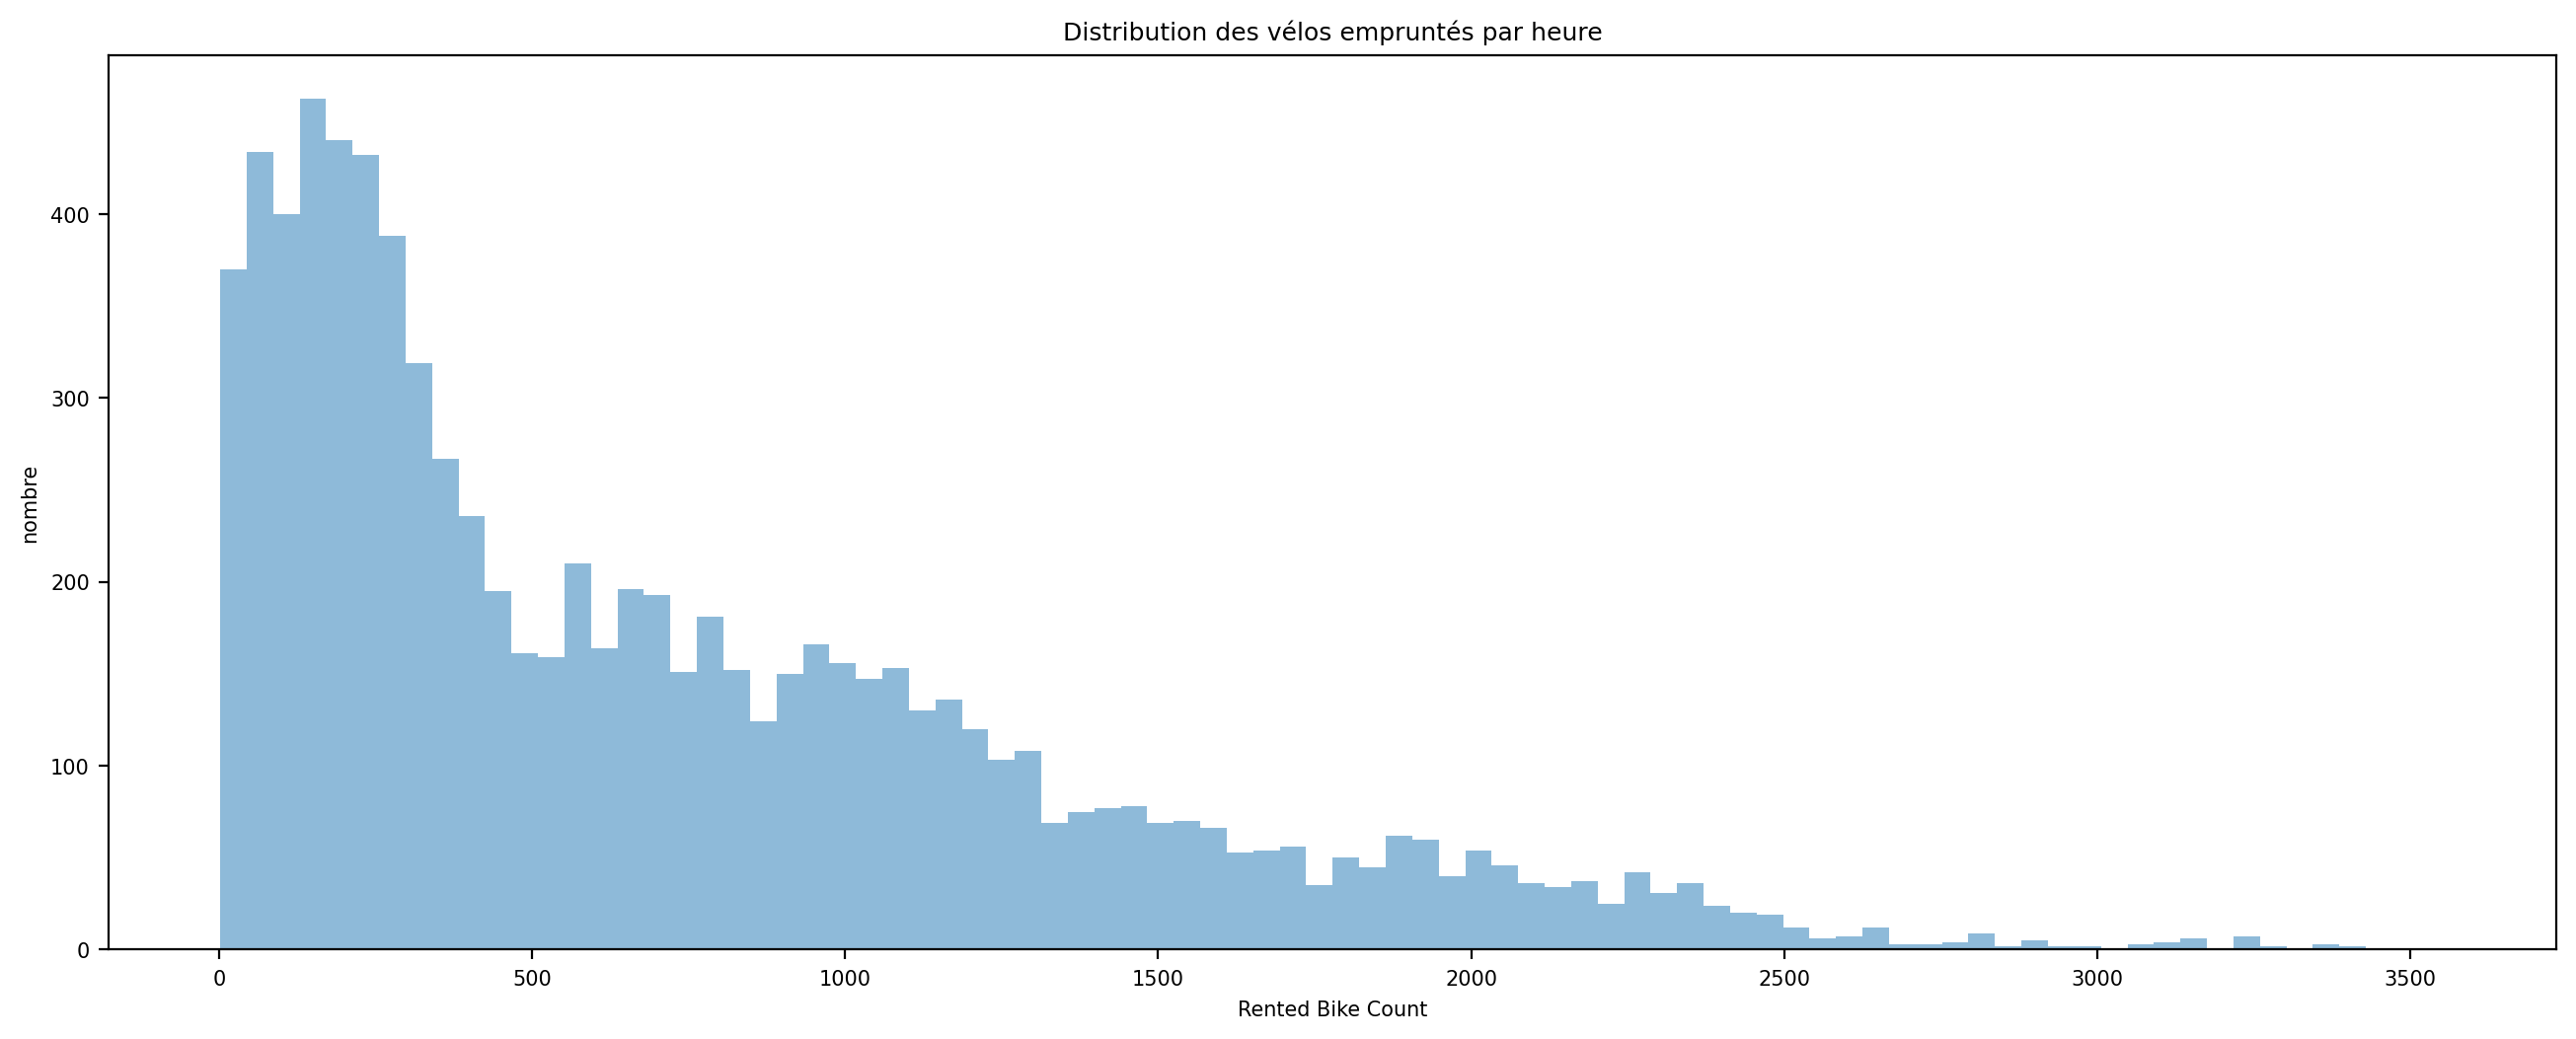

In [18]:
N = len(data) // 100

plt.hist(x=data['Rented Bike Count'], bins=N, alpha=0.5)
plt.title('Distribution des vélos empruntés par heure')
plt.xlabel('Rented Bike Count')
plt.ylabel('nombre')
pass

Notre histogramme est aplati sur la gauche, nous allons donc utiliser une transformation racine (sqrt) pour obtenir une gaussienne.

Text(0, 0.5, 'nombre')

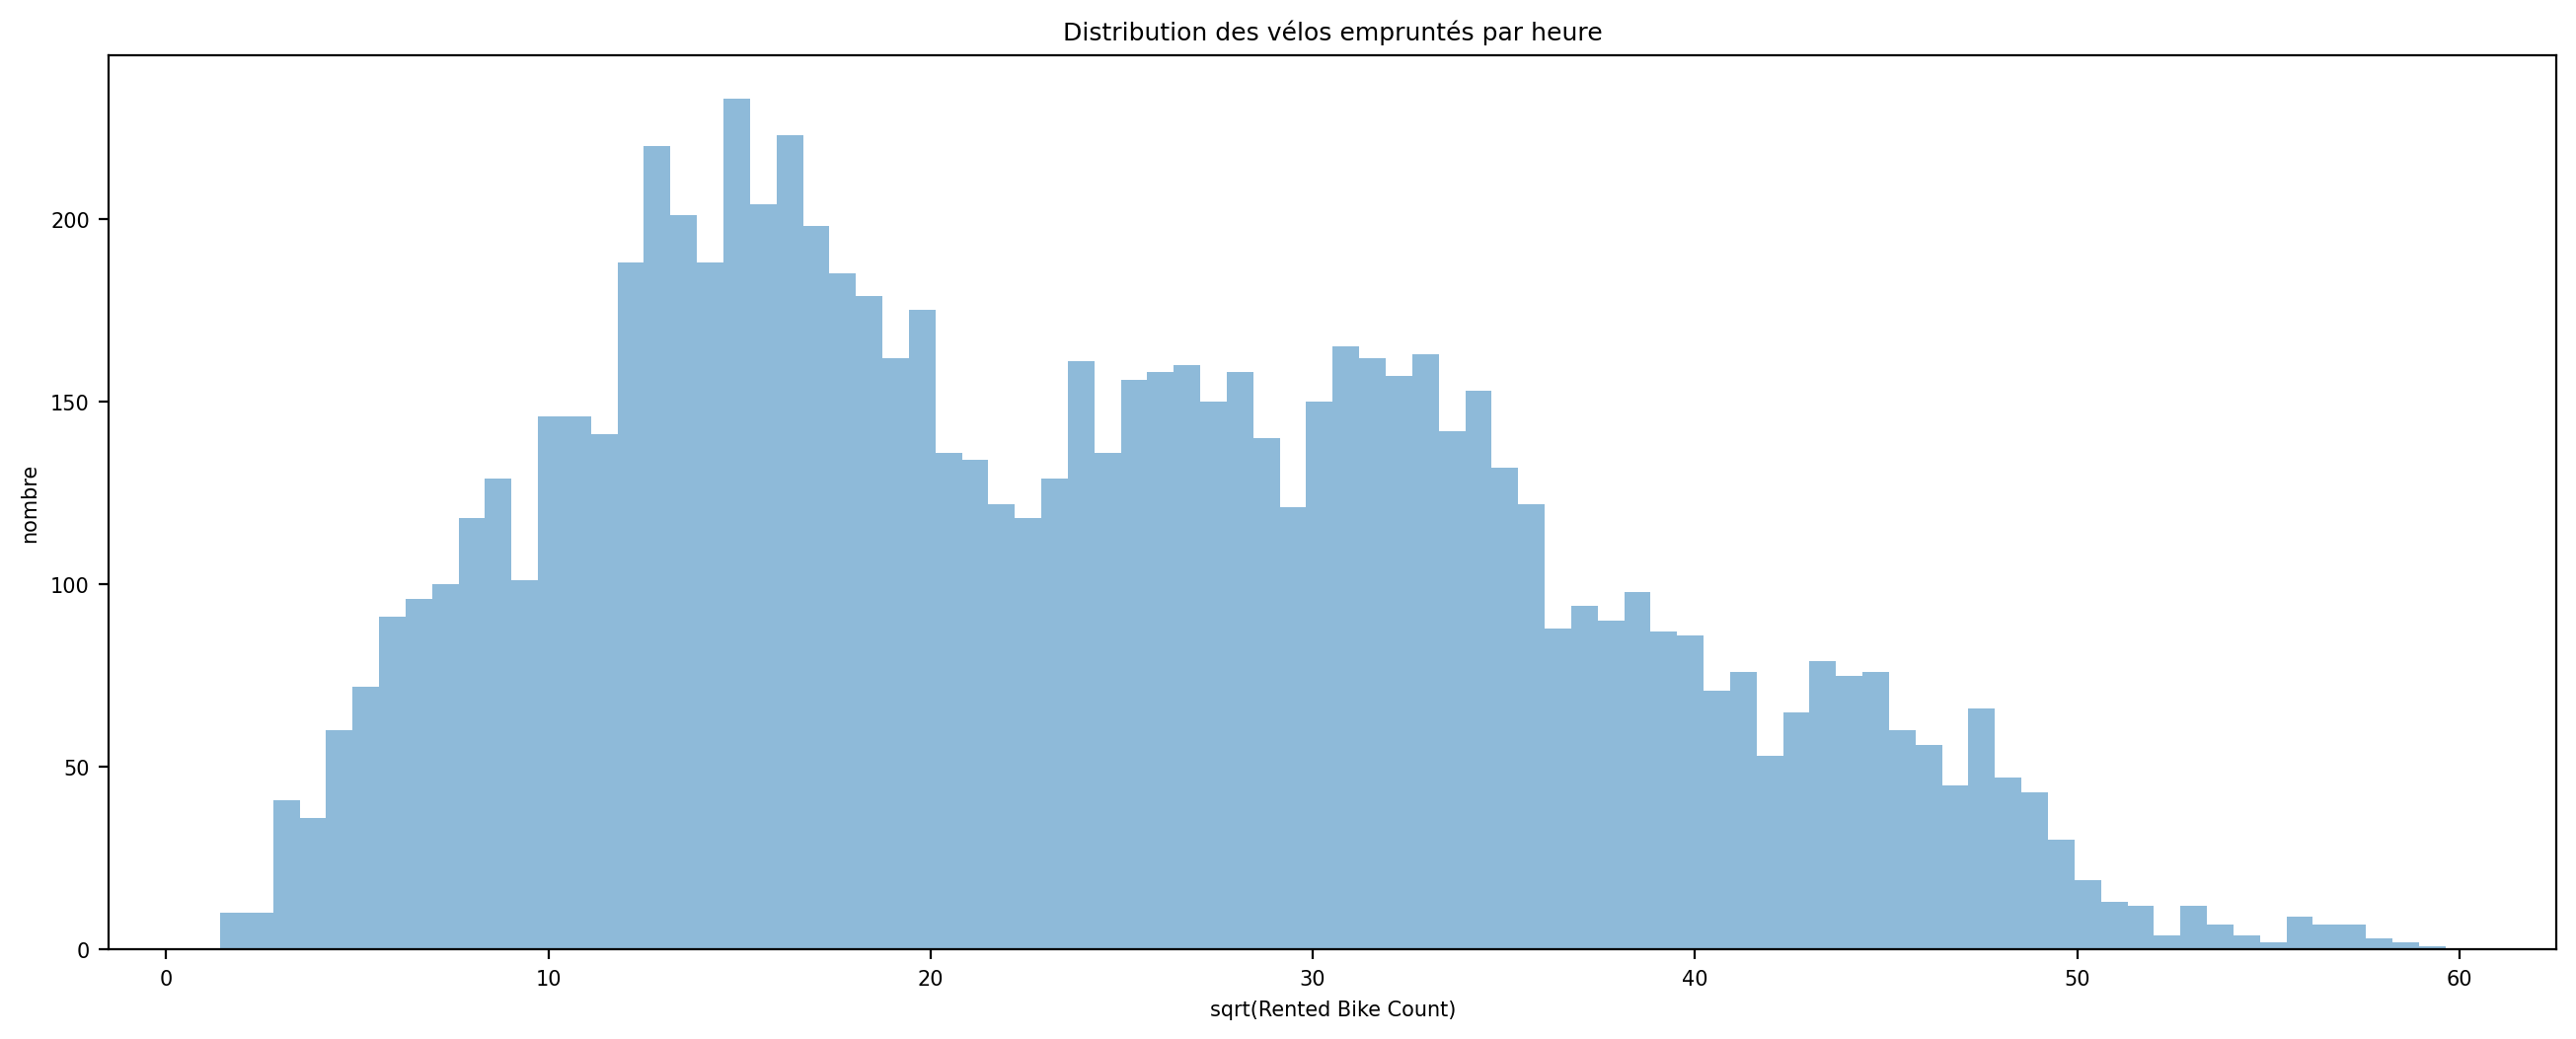

In [19]:
plt.hist(x=np.sqrt(data['Rented Bike Count']), bins=N, alpha=0.5)
plt.title('Distribution des vélos empruntés par heure')
plt.xlabel('sqrt(Rented Bike Count)')
plt.ylabel('nombre')

((array([-3.76921606, -3.54173669, -3.41673952, ...,  3.41673952,
          3.54173669,  3.76921606]),
  array([   2,    2,    2, ..., 3404, 3418, 3556], dtype=int64)),
 (604.3810279537862, 729.1569994093325, 0.9405531944528189))

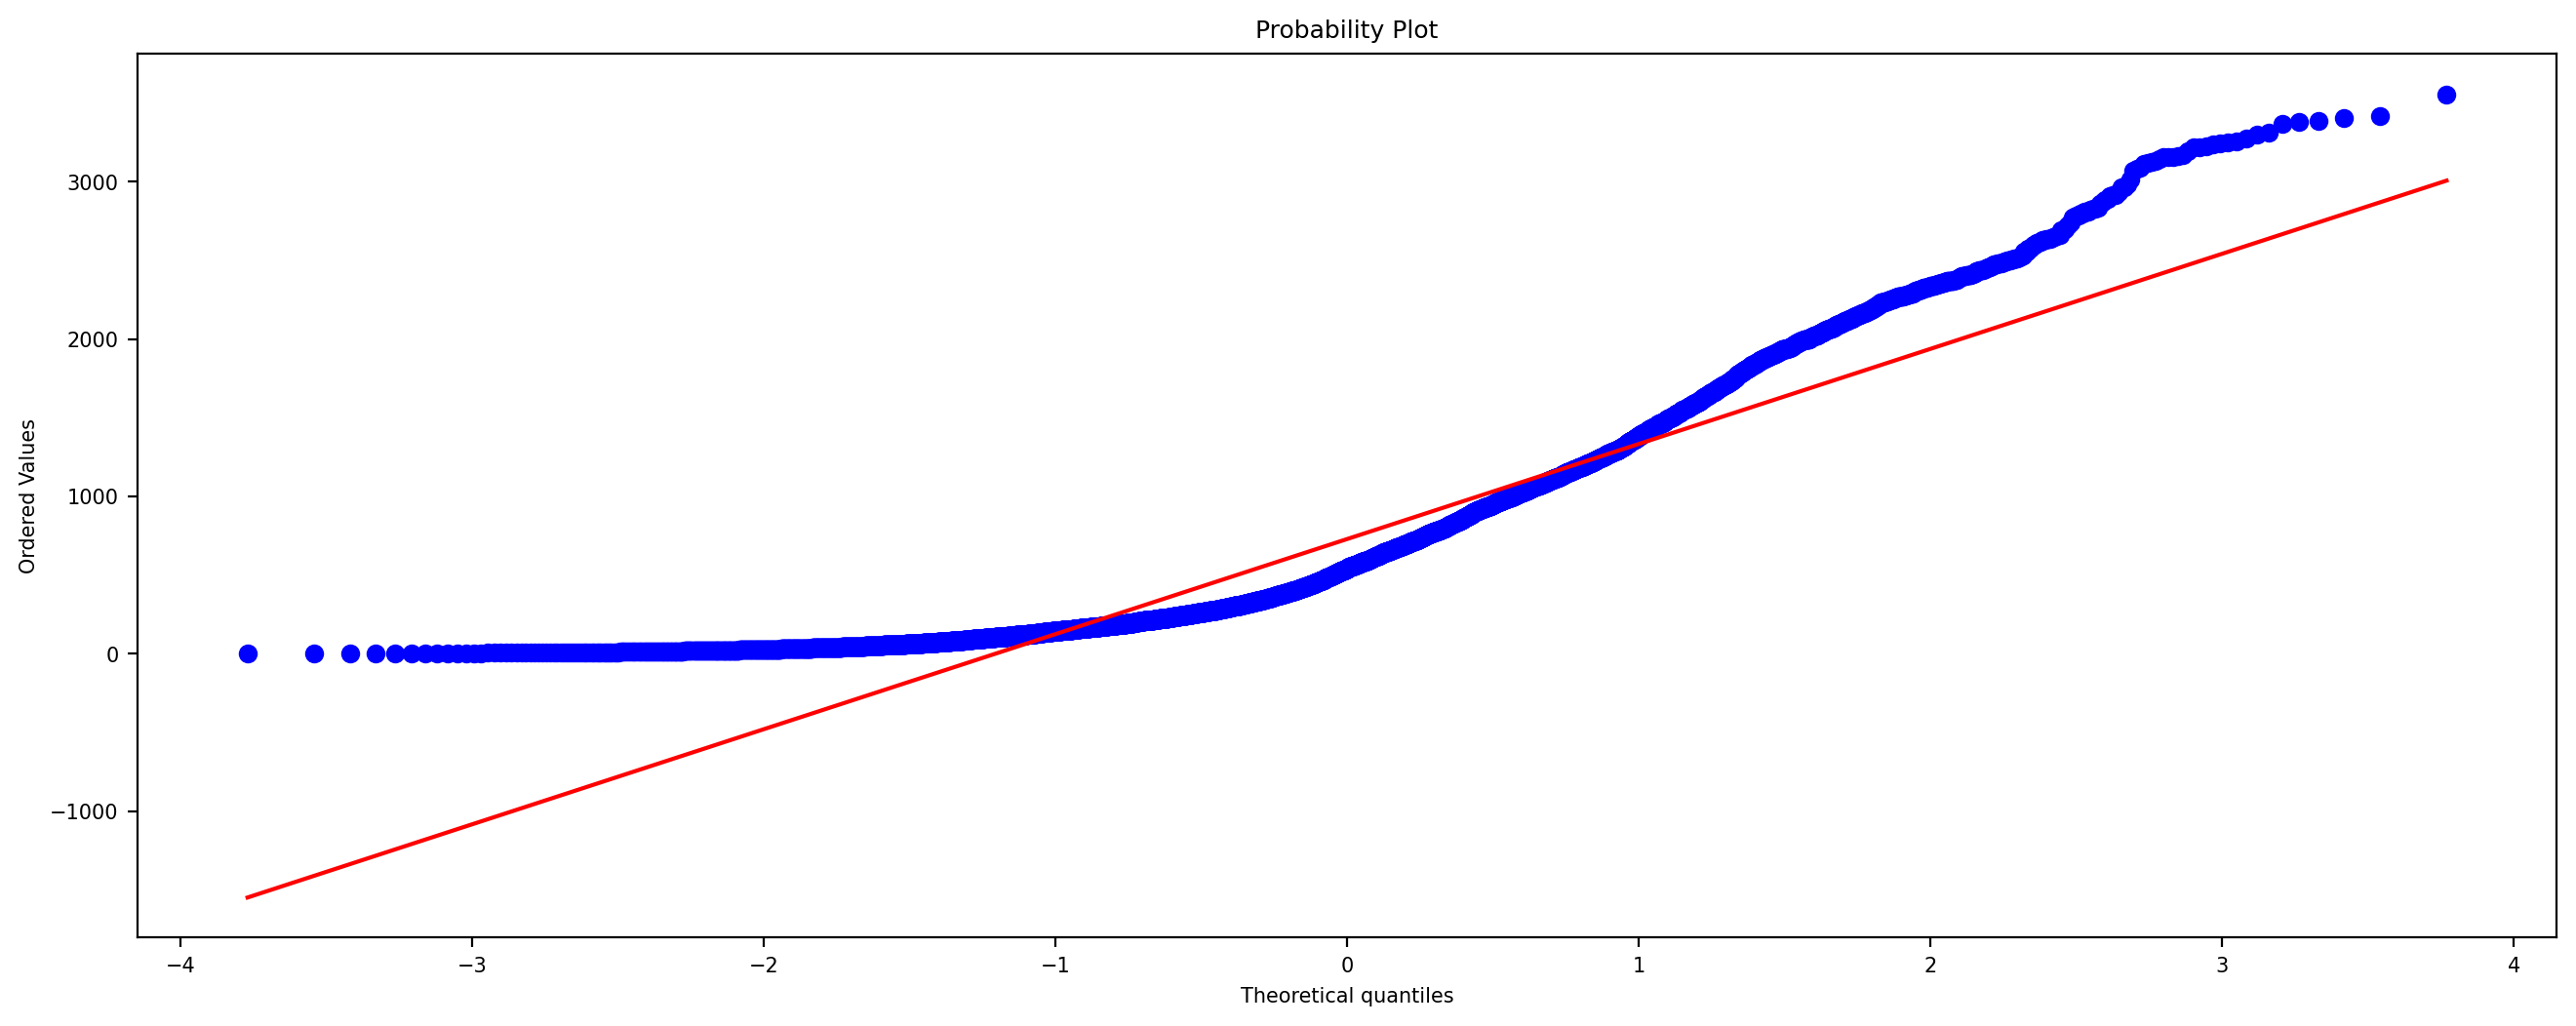

In [34]:
stats.probplot(data['Rented Bike Count'], plot=plt)

Maintenant, visualisons le nombre de vélo emprunté en fontion de la date

Text(0, 0.5, 'sqrt(Rented Bike Count)')

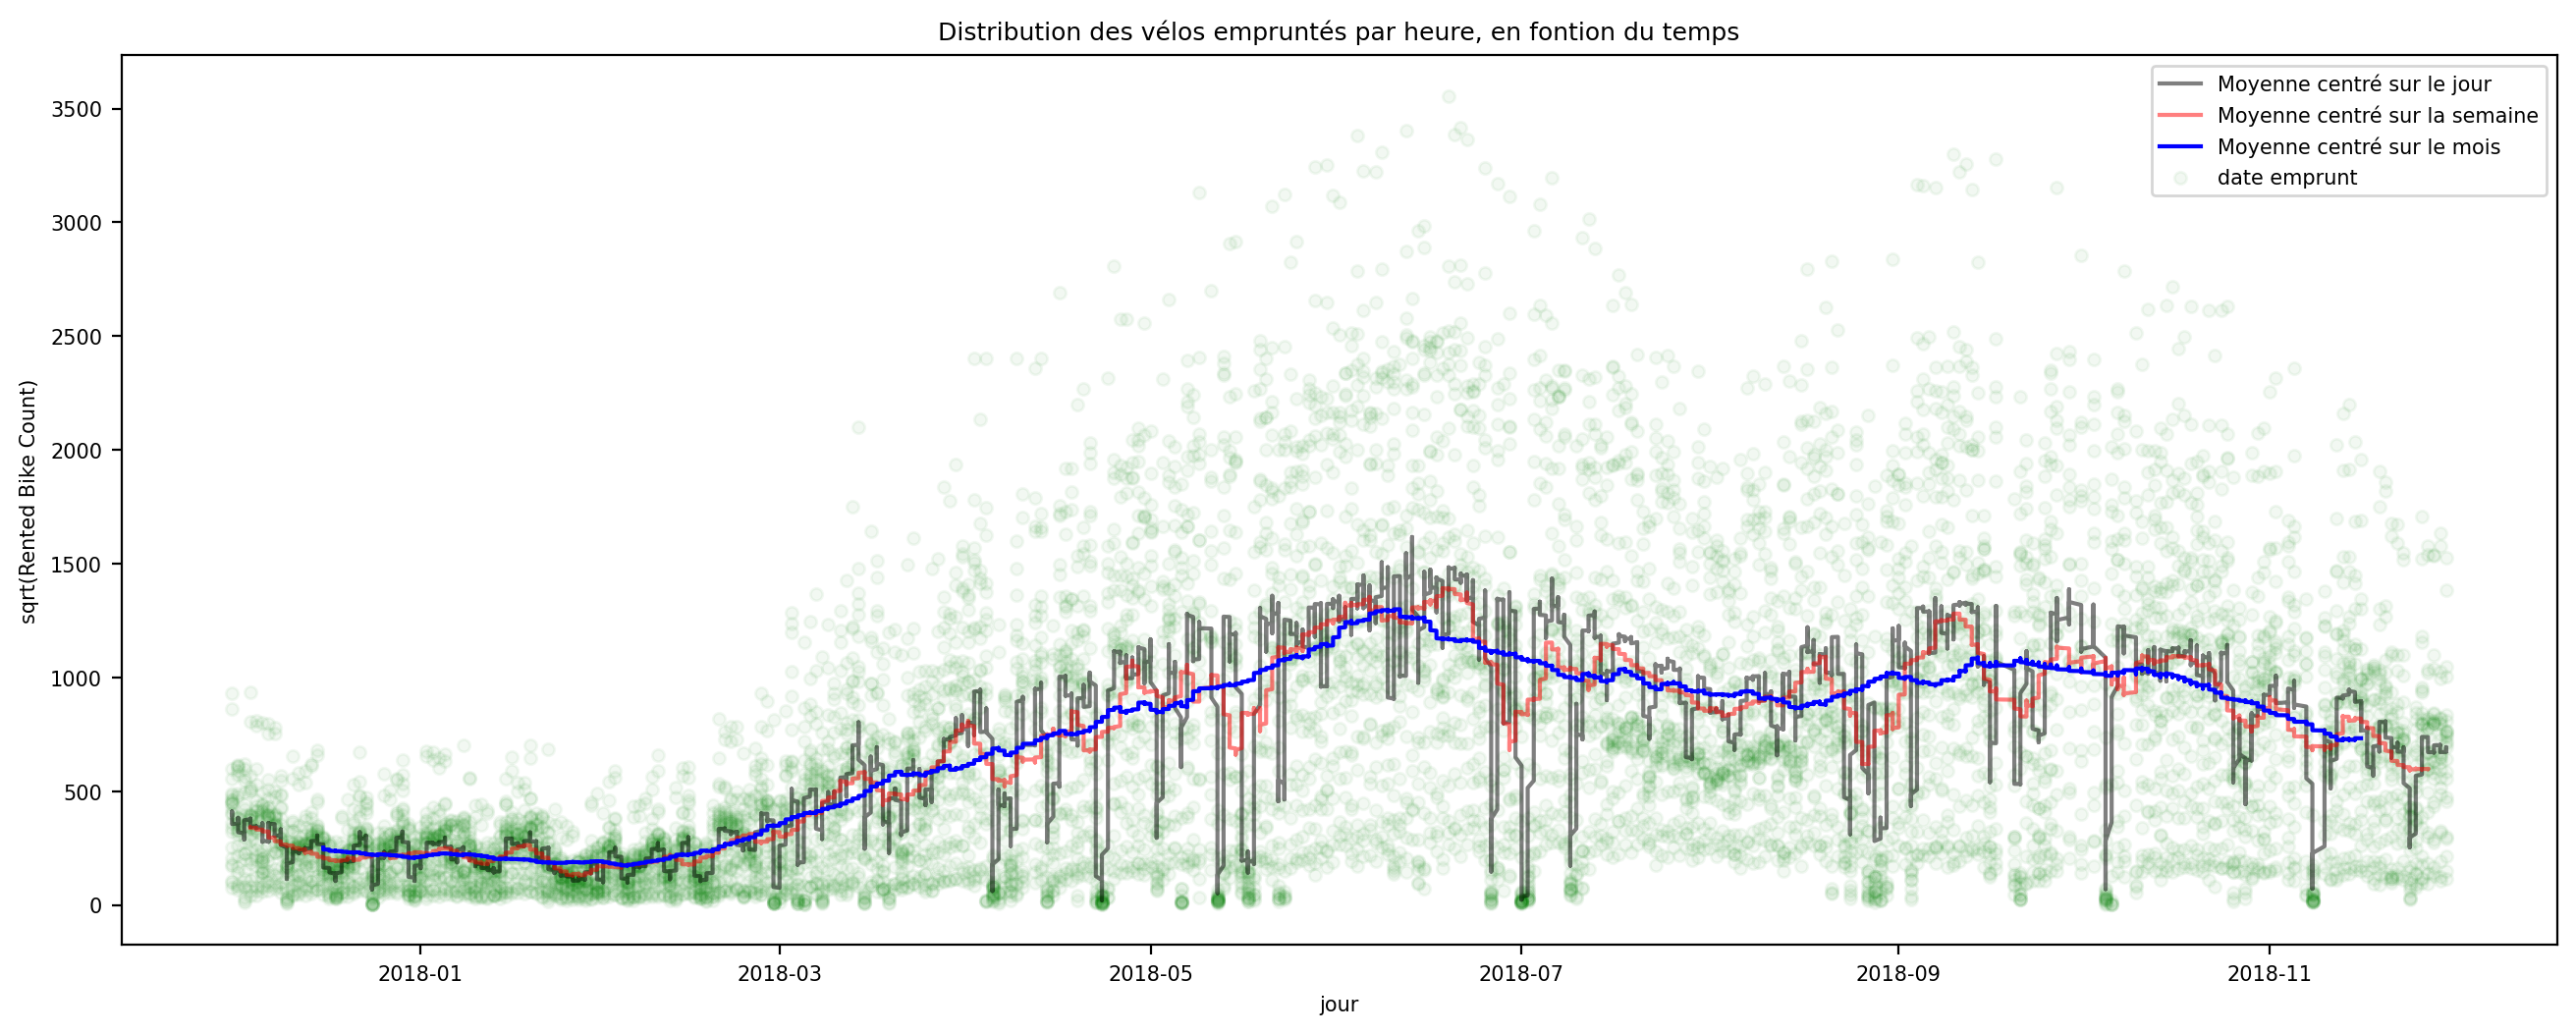

In [21]:
data.plot(x='Date', y='Rented Bike Count', alpha=0.05, kind='scatter', color='green', label='date emprunt')

plt.plot(data['Date'], data['Rented Bike Count'].rolling(1*24, center=True).mean(), color='black', alpha=0.5, label='Moyenne centré sur le jour') 
plt.plot(data['Date'], data['Rented Bike Count'].rolling(7*24, center=True).mean(), color='red', alpha=0.5, label='Moyenne centré sur la semaine') 
plt.plot(data['Date'], data['Rented Bike Count'].rolling(30*24, center=True).mean(), color='blue', label='Moyenne centré sur le mois') 
plt.legend()
plt.title('Distribution des vélos empruntés par heure, en fontion du temps')
plt.xlabel('jour')
plt.ylabel('sqrt(Rented Bike Count)')

Nous pouvons voir que le nombre d'emprunt varie significativement en fonction mois de l'année et donc par extension, la saison.
Il y a des différences en fonction des semaines et des jours, mais cela n'est pas suffisament régulier pour les deux afin de pouvoir en dire quelque chose pour le moment.

# Différence week-end et jour de la semaine

Text(0.5, 1.0, 'Nombre de velo emprunte en fonction si en semaine ou non')

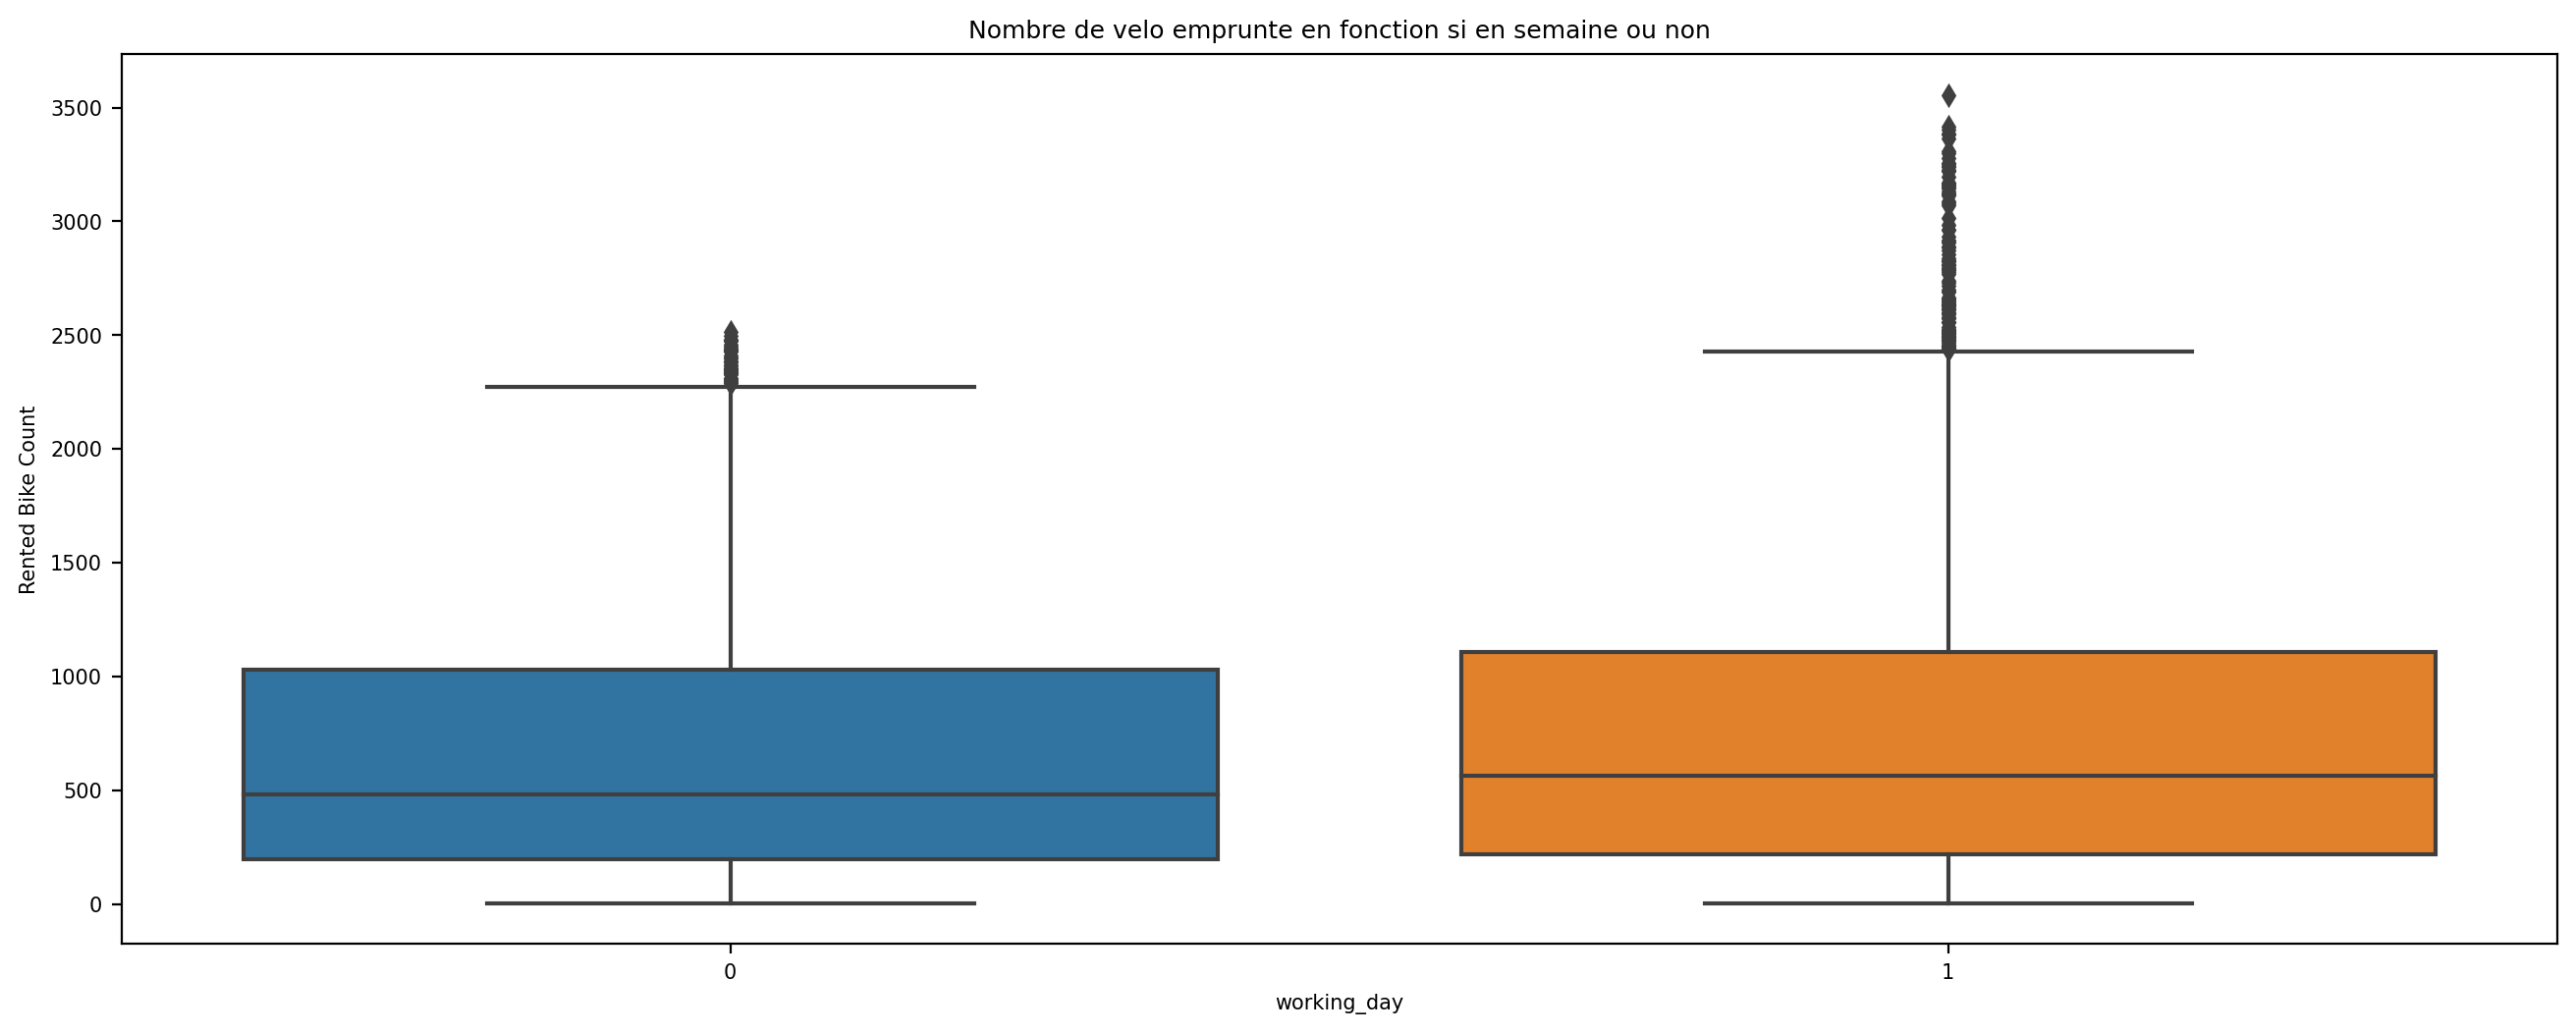

In [42]:
data['week_day'] = data['Date'].dt.day_name()
data['working_day'] = (data['Date'].dt.dayofweek < 5).astype(np.int)
ax2 = sns.boxplot(x="working_day", y="Rented Bike Count", data=data)
plt.title('Nombre de velo emprunte en fonction si en semaine ou non')

le nombre de vélo emprunté est comparable entre un jour de semaine et le week end, mais il semble que les jours de semaine ont des pics. Vérifions.

Text(0, 0.5, 'nombre emprunt velo')

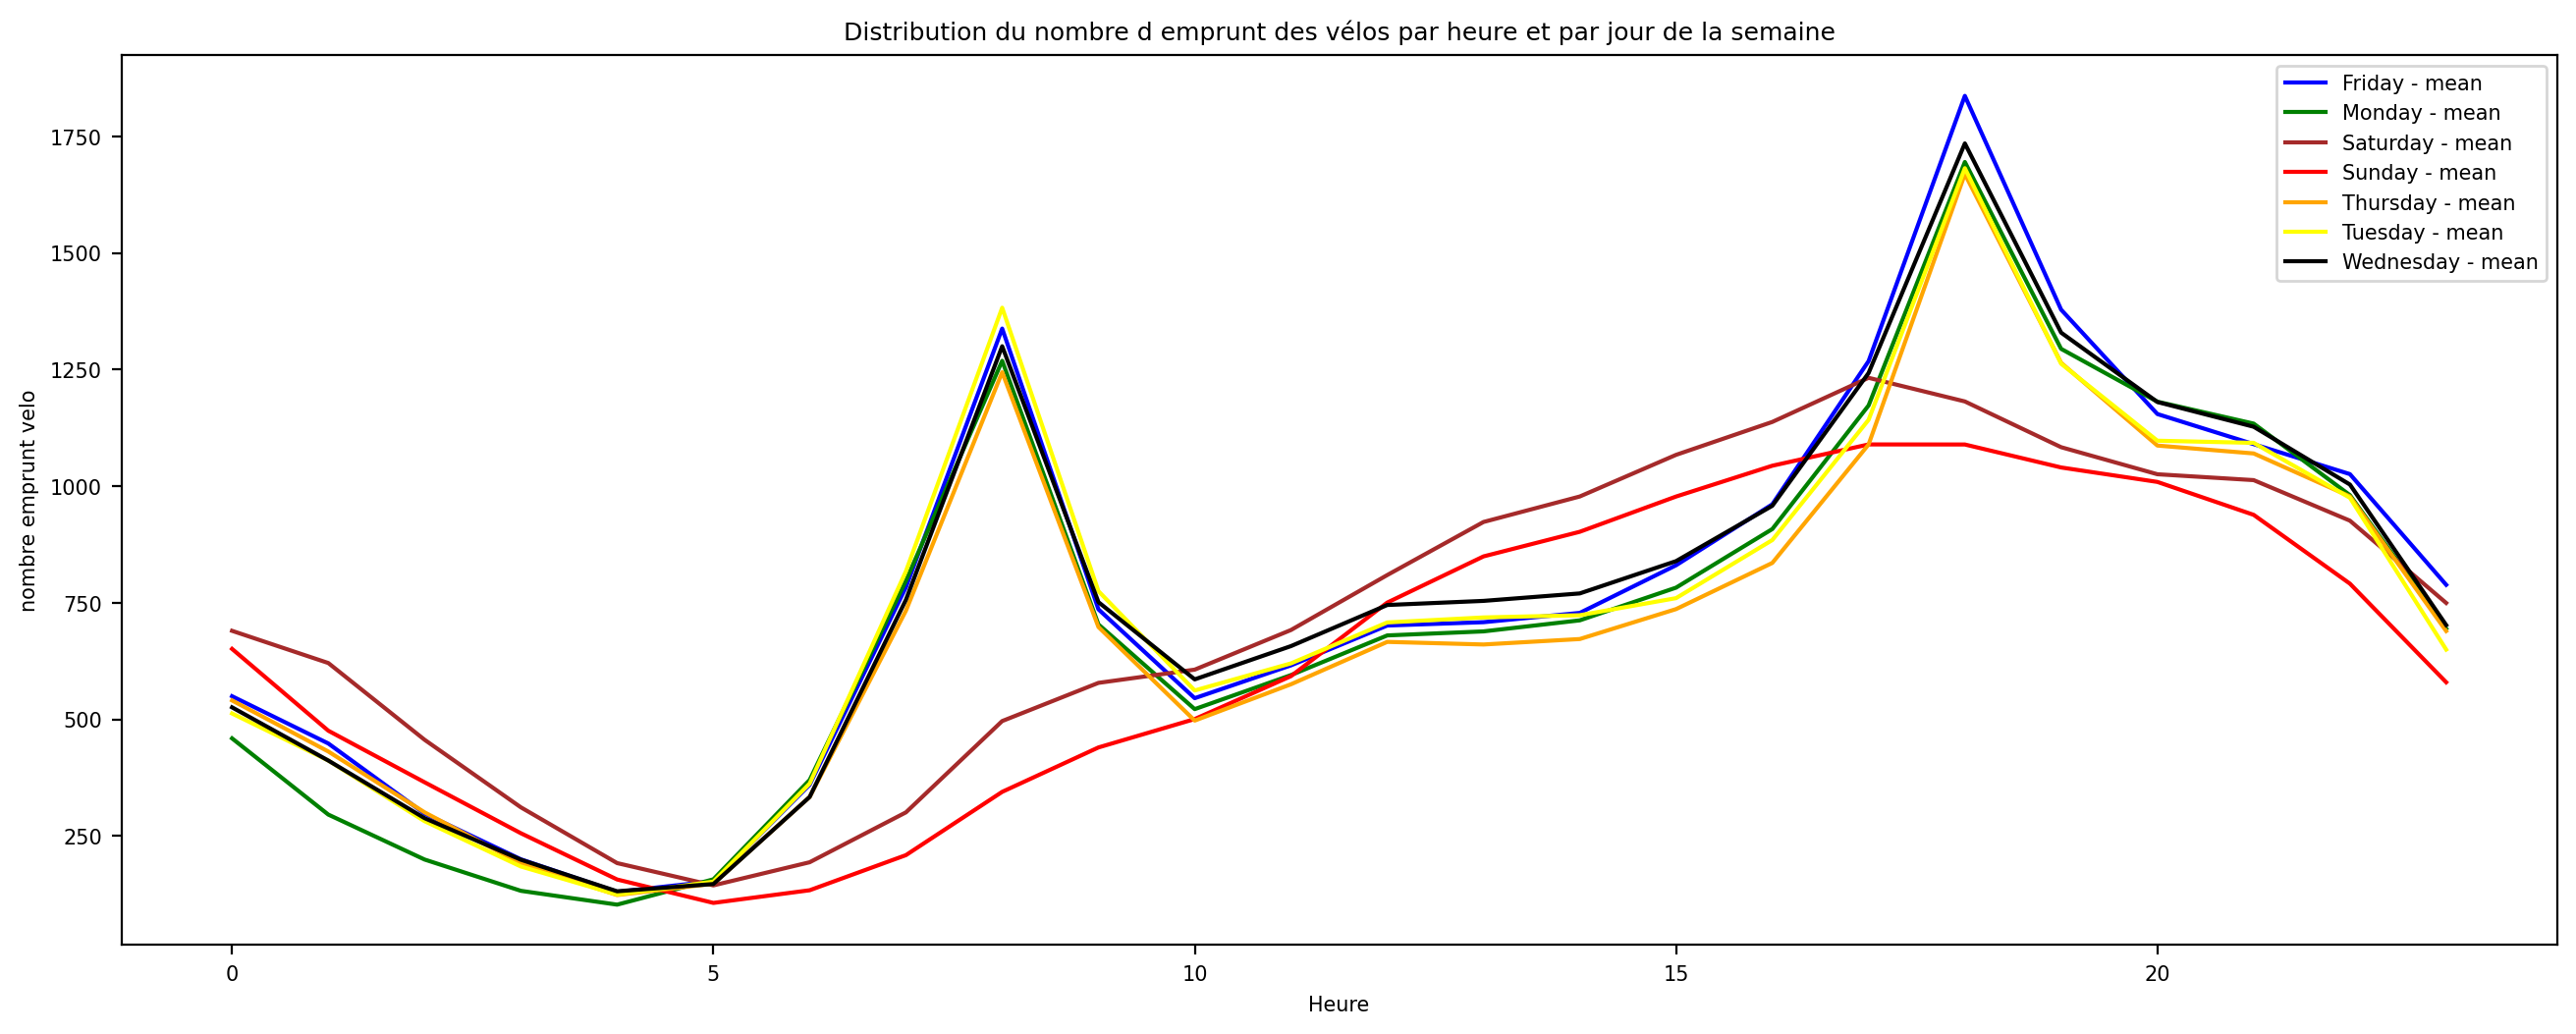

In [23]:
_temp = data.groupby(['week_day', 'Hour']).agg({'Rented Bike Count': ['mean', 'std']}).reset_index()
colors = ['blue', 'green', 'brown', 'red', 'orange', 'yellow', 'black']
for week_day, color in zip(_temp.week_day.unique(), colors):
    mean = _temp['Rented Bike Count'][_temp.week_day == week_day]['mean']
    plt.plot(_temp[_temp.week_day == week_day].Hour, mean, color=color, label=f'{week_day} - mean') 
plt.legend()
plt.title('Distribution du nombre d emprunt des vélos par heure et par jour de la semaine')
plt.xlabel('Heure')
plt.ylabel('nombre emprunt velo')

On peut observer des pics la semaine qui correspondent aux heures de travail.
On peut conclure que savoir si le jour est en semaine ou pas est important.
La difference entre le samedi et le dimanche est faible, on ne peut rien dire dessus.
De meme, on ne peut rien dire sur les different jour en semaine.

In [24]:
data['month'] = data['Date'].dt.month_name()

Text(0.5, 1.0, 'Nombre de velo emprunte en fonction du mois')

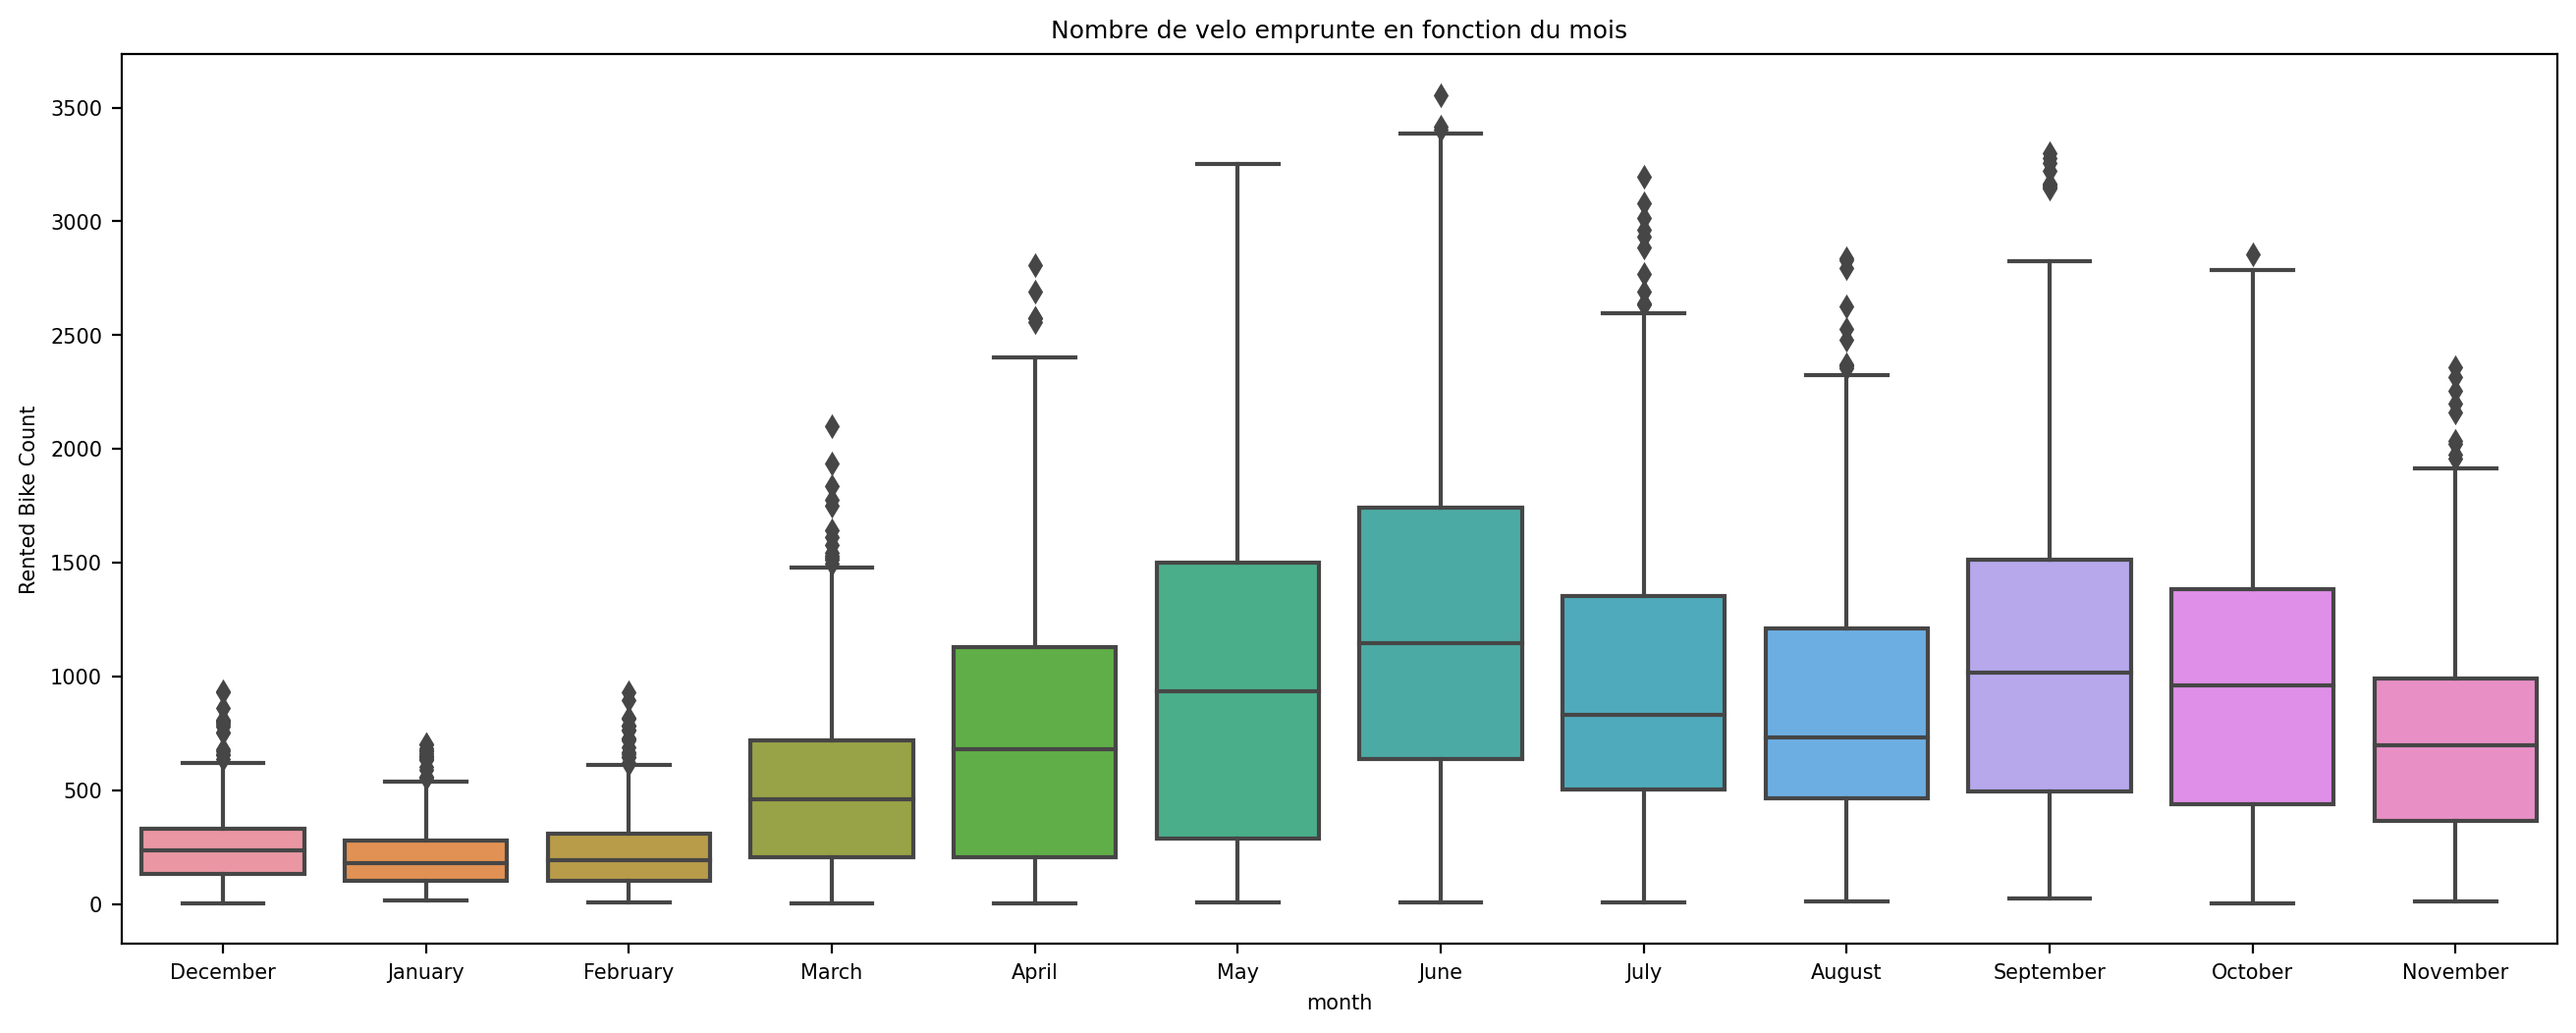

In [39]:
ax2 = sns.boxplot(x="month", y="Rented Bike Count", data=data)
plt.title('Nombre de velo emprunte en fonction du mois')

Le mois a une grande influance sur la quatité de vélo emprunté. Nous allons donc conserver cette variable.

In [26]:
data.loc[data['month'] == 'January', 'month (int)'] = 1
data.loc[data['month'] == 'February', 'month (int)'] = 2
data.loc[data['month'] == 'March', 'month (int)'] = 3
data.loc[data['month'] == 'April', 'month (int)'] = 4
data.loc[data['month'] == 'May', 'month (int)'] = 5
data.loc[data['month'] == 'June', 'month (int)'] = 6
data.loc[data['month'] == 'July', 'month (int)'] = 7
data.loc[data['month'] == 'August', 'month (int)'] = 8
data.loc[data['month'] == 'September', 'month (int)'] = 9
data.loc[data['month'] == 'October', 'month (int)'] = 10
data.loc[data['month'] == 'November', 'month (int)'] = 11
data.loc[data['month'] == 'December', 'month (int)'] = 12

## Holiday

Text(0.5, 1.0, 'Nombre de velo emprunte en fonction des periodes de vacances')

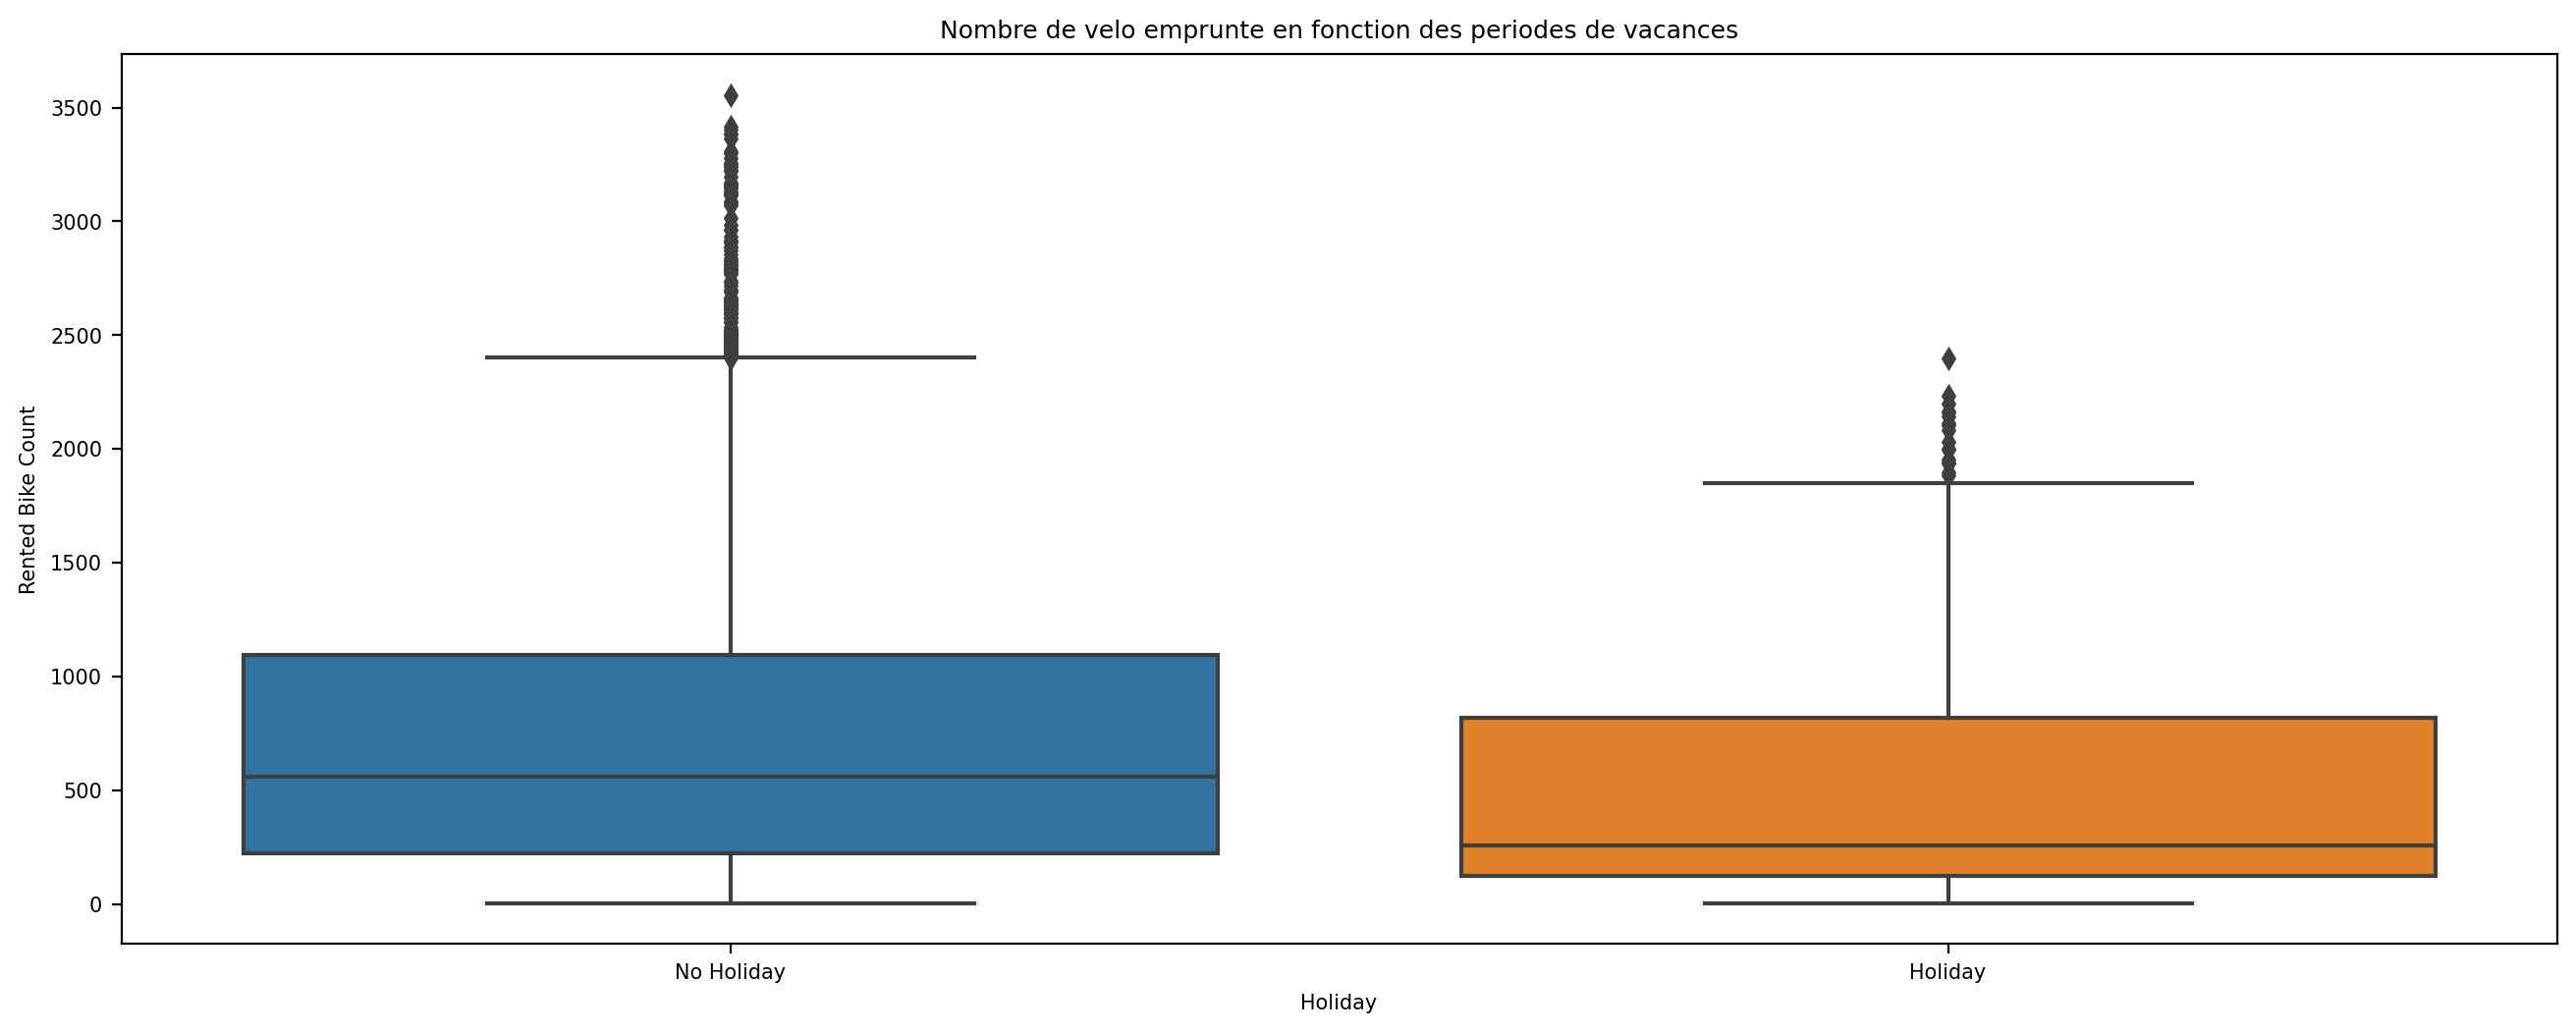

In [38]:
ax3 = sns.boxplot(x="Holiday", y="Rented Bike Count", data=data)
plt.title('Nombre de velo emprunte en fonction des periodes de vacances')

Nous pouvons voir une faible baisse du nombre de velo en période de vacances.

## Saison

Text(0.5, 1.0, 'Nombre de velo emprunte en fonction de la saison')

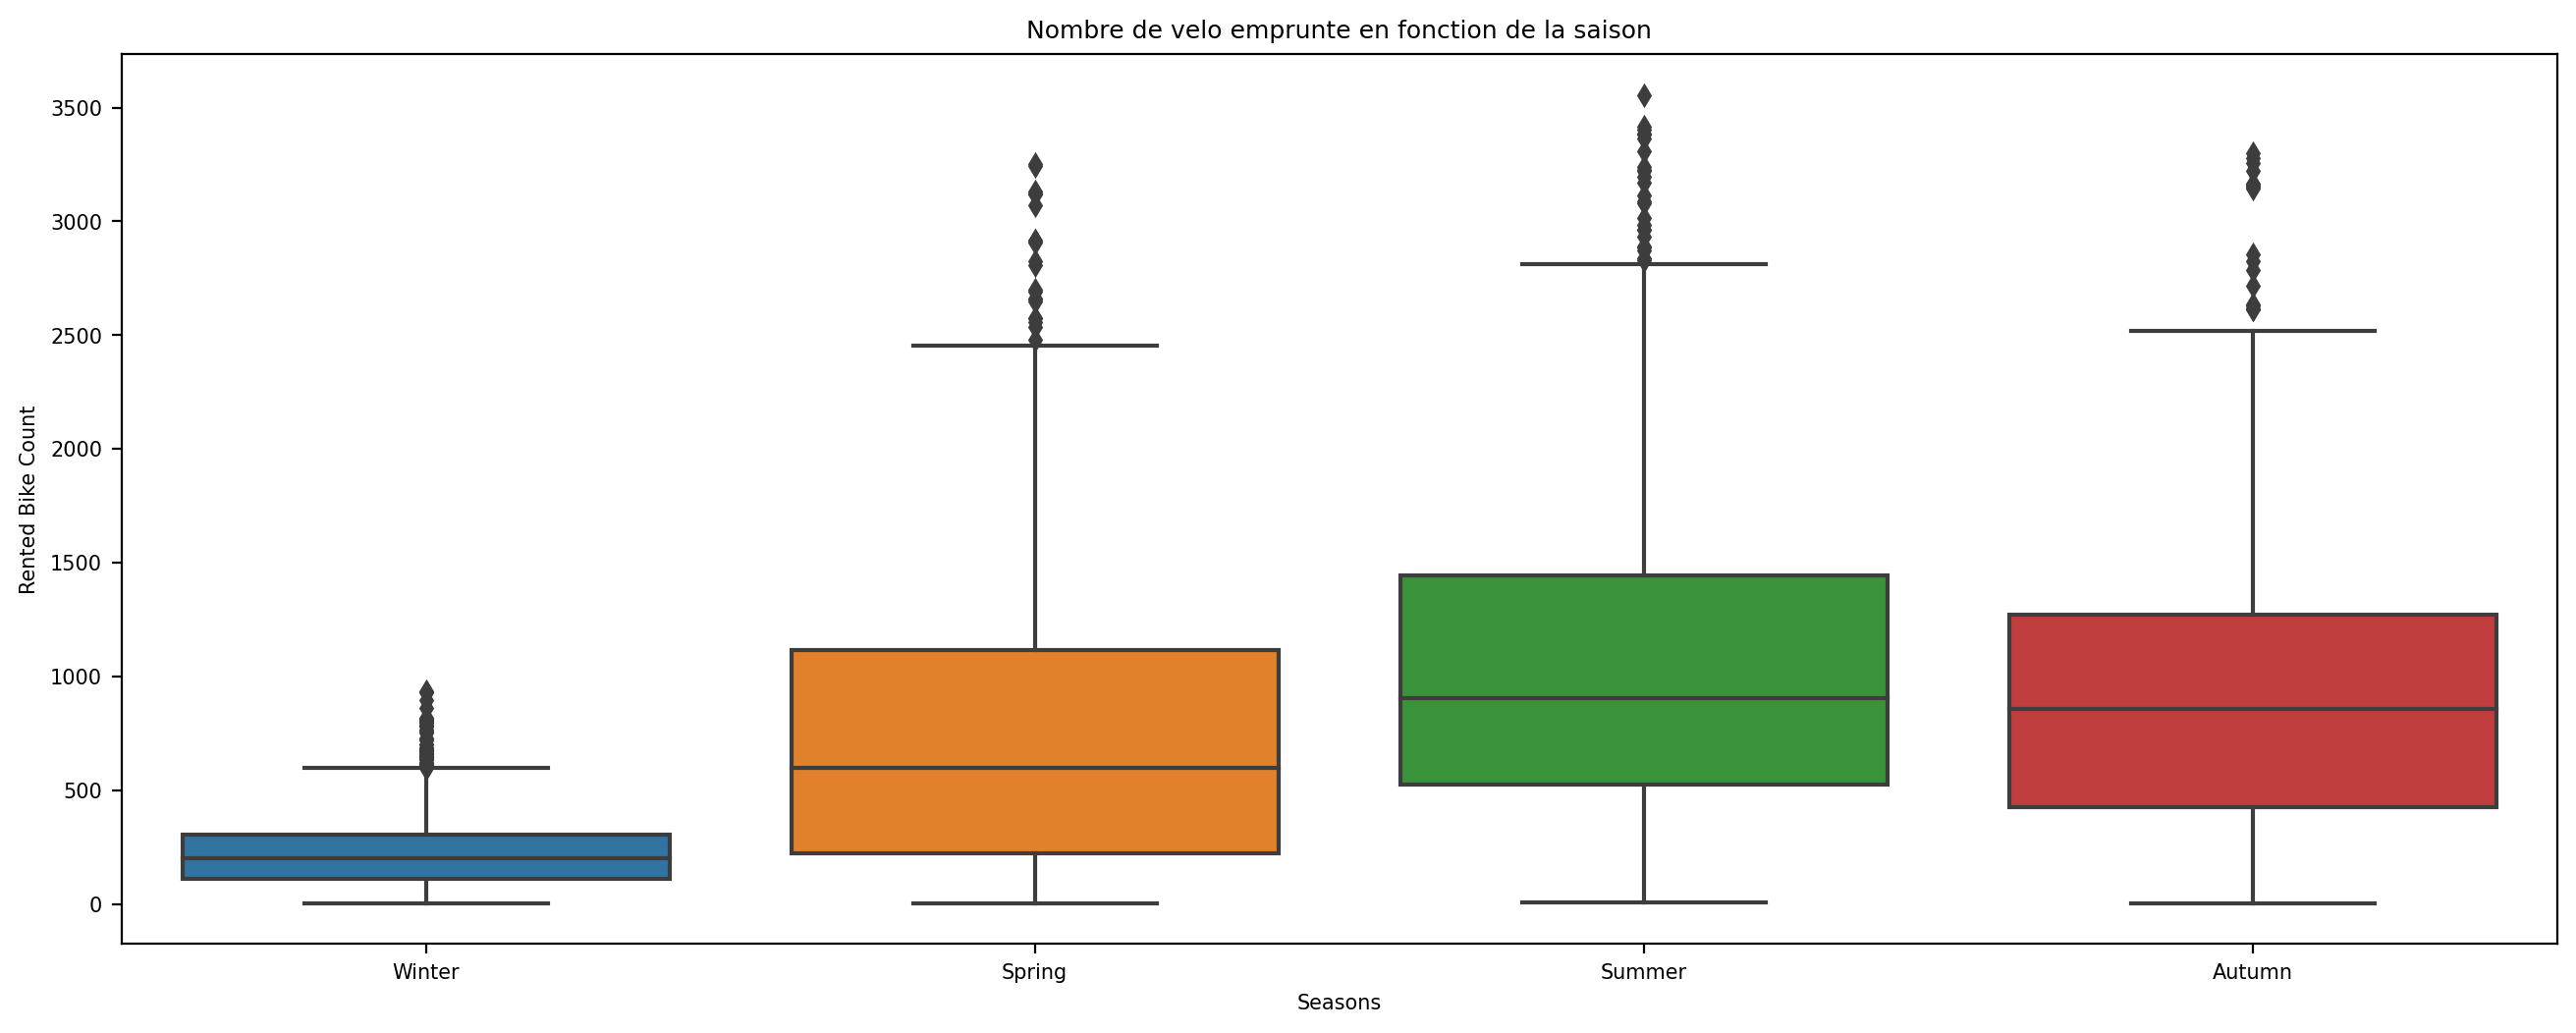

In [43]:
ax = sns.boxplot(x="Seasons", y="Rented Bike Count", data=data)
plt.title('Nombre de velo emprunte en fonction de la saison')

On peut voir comme prédit par la matrice de correlation que la saison a un impact fort sur le nombre de vélos emprunté.
L'hiver a un impact important, les autres saisons sont comparables.

## Visualisation de la matrice de corrélation

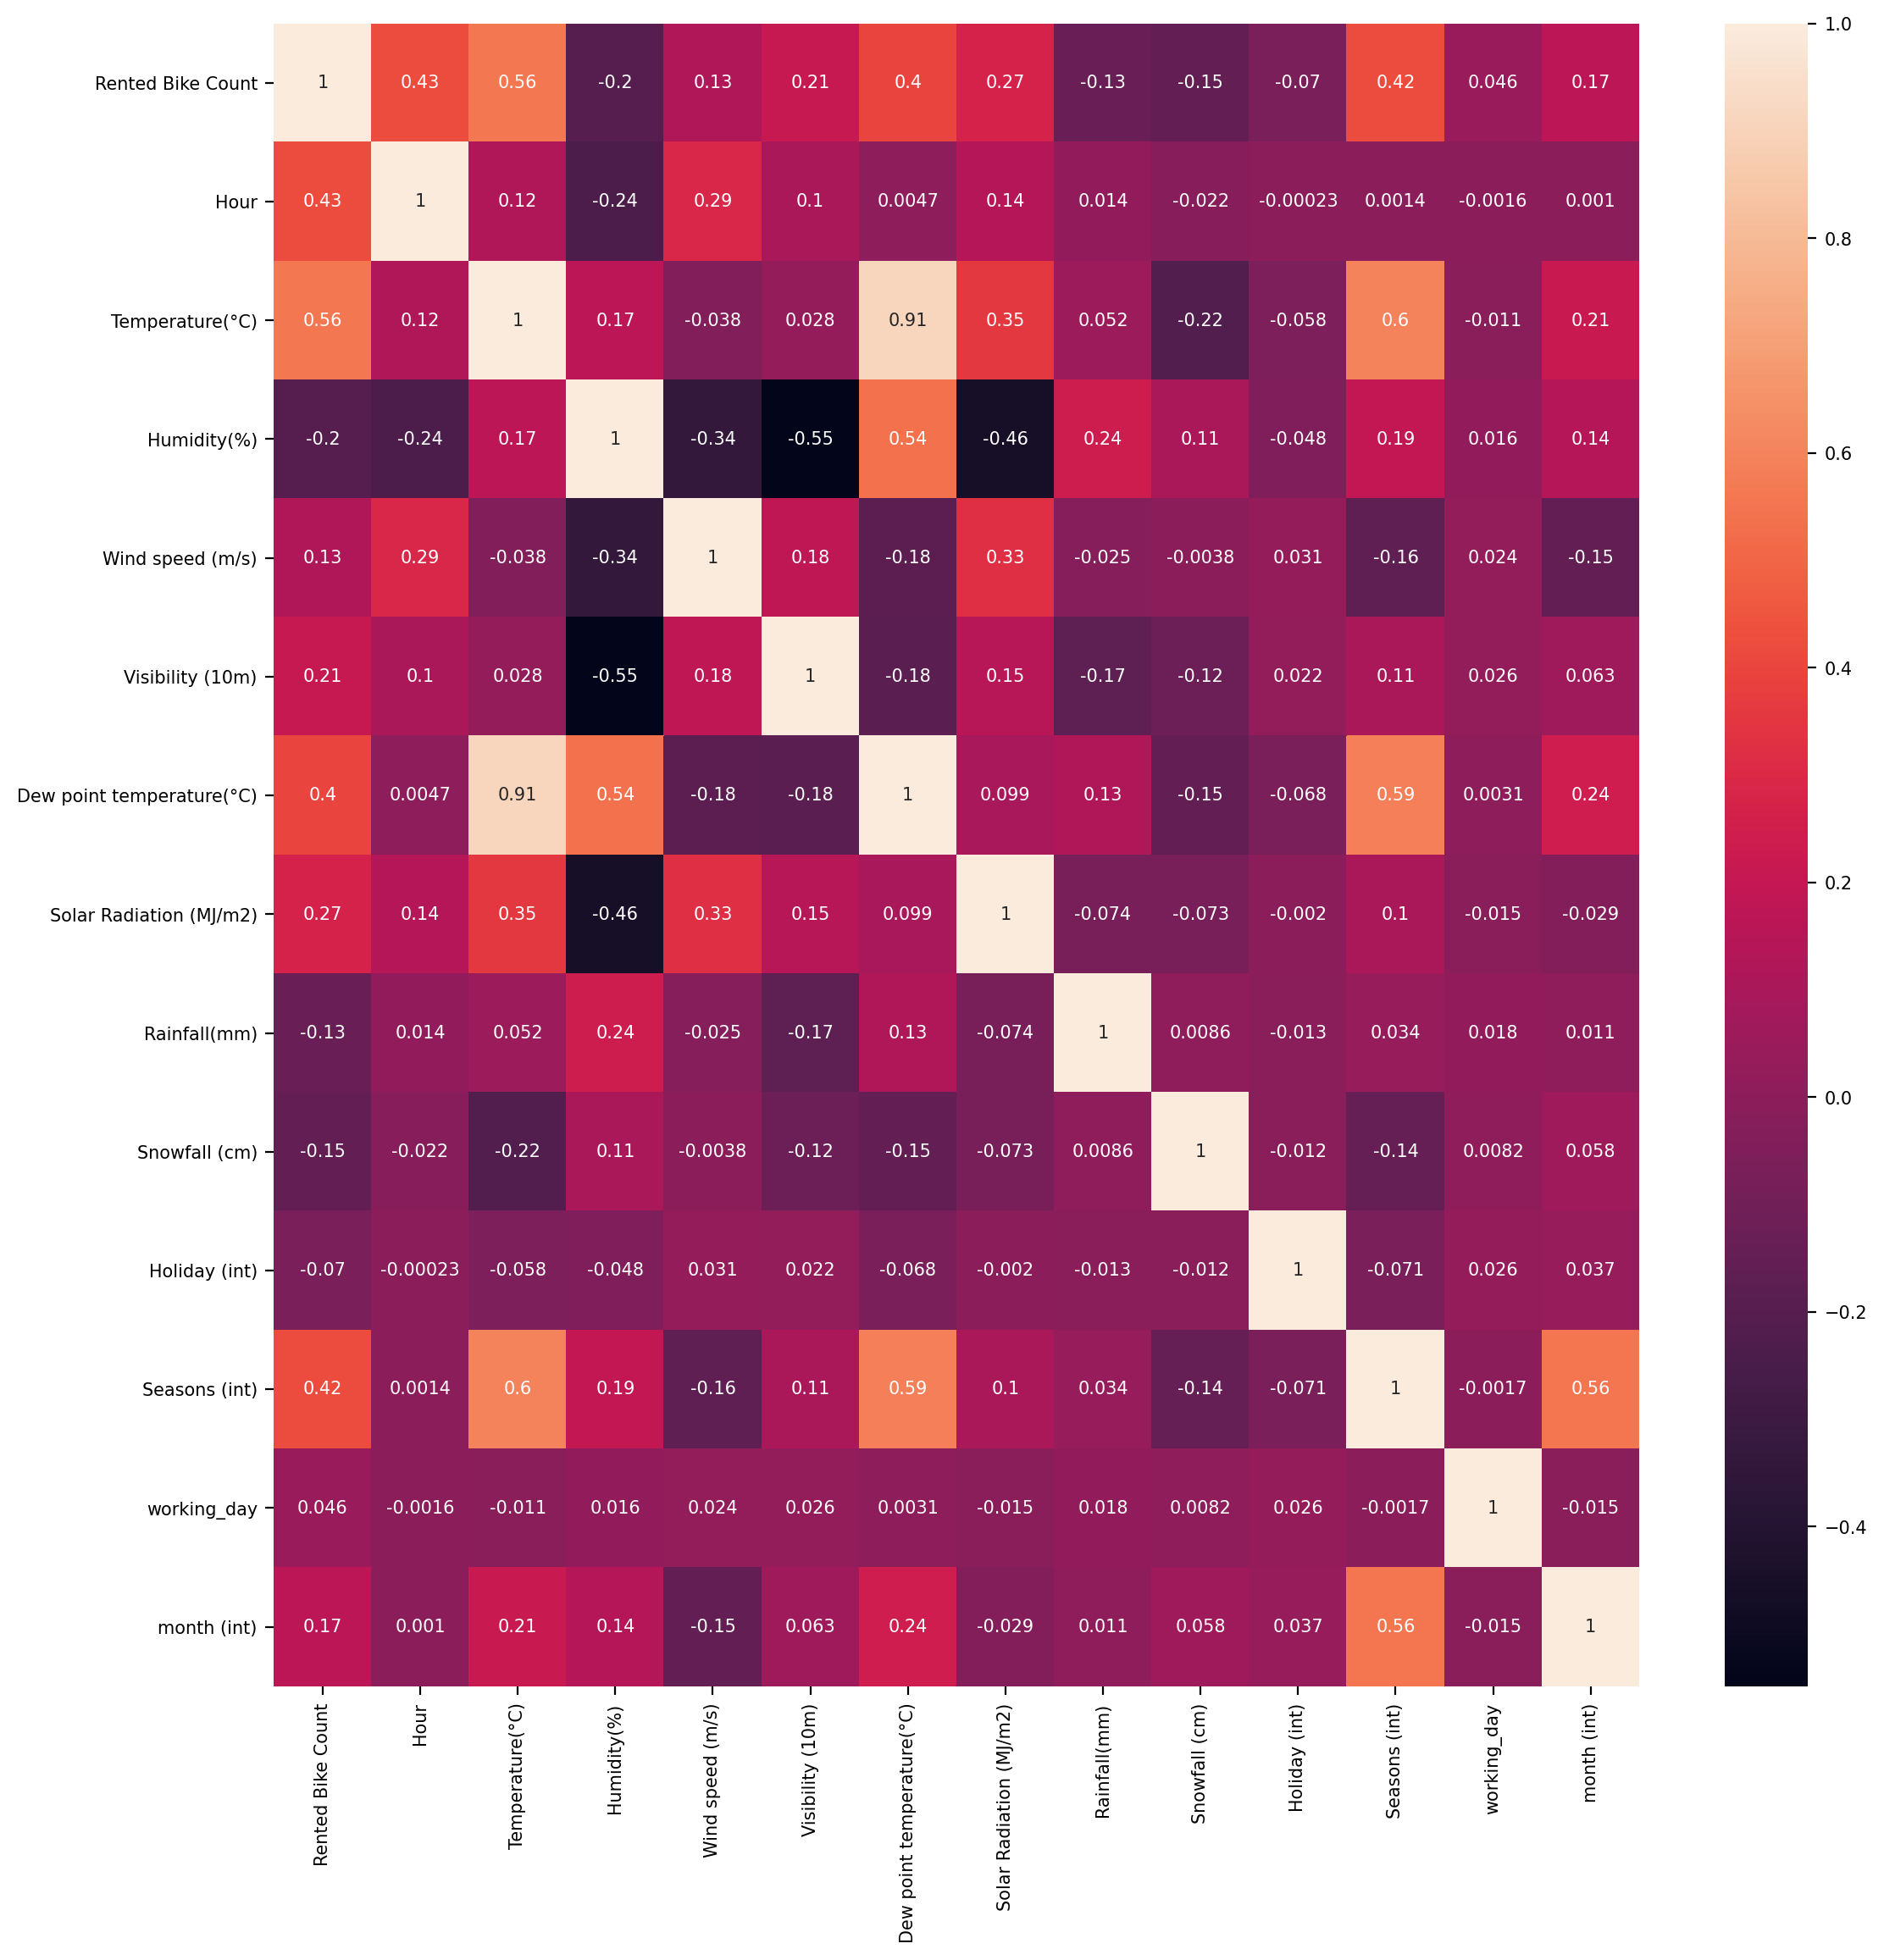

In [29]:
plt.figure(figsize = (13,13))
sns.heatmap(data.corr(), annot=True)
plt.show()

On peut voir que :
**Temperature** et **Dew point Temperature** ont une très forte correlation. Une des deux doit etre enlevé, nous avons choisi **Dew point Temperature**.

**Windspeed**, **humidity**, **snowfall** et **Rainfall** ne semble pas avoir un impact fort sur le nombre de velo.

**Visibility** et **solar radiation**  ont une correlation forte avec le nombre de velo

